In [ ]:
#download and save as (-O menu.scv)
!wget -O menu.csv https://raw.githubusercontent.com/mch-fauzy/Data-Science/main/McD-Nutritional-Facts/menu.csv

--2020-10-21 08:27:52--  https://raw.githubusercontent.com/mch-fauzy/dataset/main/menu.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29988 (29K) [text/plain]
Saving to: ‘menu.csv’

menu.csv            100%[===================>]  29.29K  --.-KB/s    in 0.008s  

2020-10-21 08:27:52 (3.80 MB/s) - ‘menu.csv’ saved [29988/29988]



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#df = pd.read_csv('menu.csv')

In [ ]:
df = pd.read_csv('/content/menu.csv')

In [ ]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [ ]:
print(df.dtypes)

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object


In [ ]:
#df.describe(include = 'all')

In [ ]:
#True berarti missing data
missing_data = df.isnull()

for column in missing_data.columns.values:
    print(missing_data[column].value_counts(), "\n")

False    260
Name: Category, dtype: int64 

False    260
Name: Item, dtype: int64 

False    260
Name: Serving Size, dtype: int64 

False    260
Name: Calories, dtype: int64 

False    260
Name: Calories from Fat, dtype: int64 

False    260
Name: Total Fat, dtype: int64 

False    260
Name: Total Fat (% Daily Value), dtype: int64 

False    260
Name: Saturated Fat, dtype: int64 

False    260
Name: Saturated Fat (% Daily Value), dtype: int64 

False    260
Name: Trans Fat, dtype: int64 

False    260
Name: Cholesterol, dtype: int64 

False    260
Name: Cholesterol (% Daily Value), dtype: int64 

False    260
Name: Sodium, dtype: int64 

False    260
Name: Sodium (% Daily Value), dtype: int64 

False    260
Name: Carbohydrates, dtype: int64 

False    260
Name: Carbohydrates (% Daily Value), dtype: int64 

False    260
Name: Dietary Fiber, dtype: int64 

False    260
Name: Dietary Fiber (% Daily Value), dtype: int64 

False    260
Name: Sugars, dtype: int64 

False    260
Name: Protein

**A) How many calories does the
average McDonald's value
meal contain?**

In [ ]:
#df_item_per_calories = df[['Item', 'Calories']]
#df_item_per_calories.head()

In [ ]:
#df['Category'].unique()

In [ ]:
df_calories_per_category = df[['Category','Calories']]
#di group (kategori yang sama dijadikan satu) dengan kategori sebagai index
df_calories_per_category = round(df_calories_per_category.groupby(['Category'], as_index = True).mean().sort_values(by = 'Calories', ascending = True), 2)
#df_calories_per_category['Calories']
df_calories_per_category

,Calories
Category,
Beverages,113.70
Desserts,222.14
Snacks & Sides,245.77
Salads,270.00
Coffee & Tea,283.89
Beef & Pork,494.00
Breakfast,526.67
Smoothies & Shakes,531.43
Chicken & Fish,552.96


113.7
222.14
245.77
270.0
283.89
494.0
526.67
531.43
552.96
8


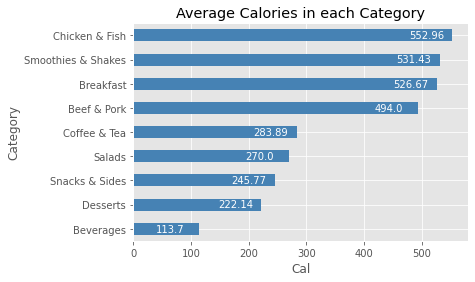

In [ ]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('ggplot') #visual figure style

df_calories_per_category['Calories'].plot(kind = 'barh', color = 'steelblue')
plt.xlabel('Cal')
plt.title('Average Calories in each Category')

# annotate label to each categories
for index, value in enumerate(df_calories_per_category['Calories']): 
    label = format(float(value), ',') # separate value with with commas
    plt.annotate(label, xy=(value - 75 , index - 0.125), color='white') #xy -> posisi label
    print(value)
print(index)
plt.show()

In [ ]:
print("Average Calories:", round(df['Calories'].mean(), 2))

Average Calories: 368.27


Jadi dapat disimpulkan bahwa rata-rata kalori seluruh menu McD adalah 368.27

**B)How much do beverages,
like soda or coffee,
contribute to the overall
caloric intake?**

Generally, the recommended daily calorie intake is 2,000 calories a day for women and 2,500 for men.

Source : https://www.nhs.uk/common-health-questions/food-and-diet/what-should-my-daily-intake-of-calories-be/

In [ ]:
men_cal_daily_intake = 2500
women_cal_daily_intake = 2000

#calories_intake = df[(df['Category'] == 'Beverages') | (df['Category'] == 'Coffee & Tea')]
df_calories_intake = df[['Category', 'Calories']]

bev_calories_intake = df_calories_intake[(df['Category'] == 'Beverages')]
avg_bev_calories_intake = bev_calories_intake['Calories'].mean()
print('Average Beverages Calories:', round(avg_bev_calories_intake, 2))

cnt_calories_intake = df_calories_intake[(df['Category'] == 'Coffee & Tea')]
avg_cnt_calories_intake = cnt_calories_intake['Calories'].mean()
print('Average Coffee & Tea Calories:', round(avg_cnt_calories_intake, 2))

Total_bev_cnt_calories = avg_bev_calories_intake + avg_cnt_calories_intake

calories_contribute_men = round((Total_bev_cnt_calories/men_cal_daily_intake)*100, 2)
calories_contribute_women = round((Total_bev_cnt_calories/women_cal_daily_intake)*100, 2)
#print(calories_contribute_men, '%')
#print(calories_contribute_women, '%')

Average Beverages Calories: 113.7
Average Coffee & Tea Calories: 283.89


In [ ]:
cal_contribution_data = {'Men': [calories_contribute_men, 100-calories_contribute_men], 'Women': [calories_contribute_women, 100-calories_contribute_women]}
df_bev_cnt_calories_contribute = pd.DataFrame(cal_contribution_data, index = ['Calories Contribution', 'Remaining Daily Intake'])
df_bev_cnt_calories_contribute = df_bev_cnt_calories_contribute.transpose()

print('Total Beverages and Coffee & Tea Calories:', round(Total_bev_cnt_calories, 2))

df_bev_cnt_calories_contribute
#df_bev_cnt_calories_contribute.rename(columns={'0' = 'Cal Intake'})

Total Beverages and Coffee & Tea Calories: 397.6


,Calories Contribution,Remaining Daily Intake
Men,15.90,84.10
Women,19.88,80.12


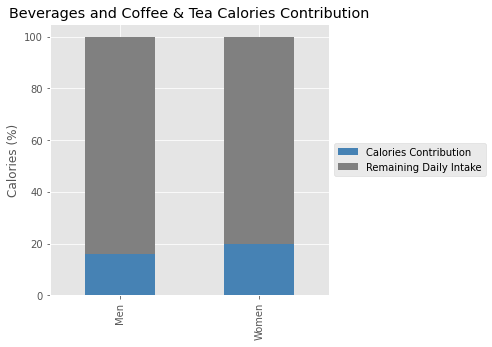

In [ ]:
df_bev_cnt_calories_contribute[['Calories Contribution', 'Remaining Daily Intake']].plot(kind = 'bar', figsize=(5,5), color = ['steelblue','gray'], stacked = True, width=0.5)
plt.ylabel('Calories (%)')
plt.title('Beverages and Coffee & Tea Calories Contribution')
plt.legend(loc = 'center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Berdasarkan grafik dan tabel diatas, Beverages dan Coffee & Tea dapat memenuhi kalori harian sebesar 15.9% untuk Laki-Laki dan 19.88% untuk Perempuan 

**C) Does ordered grilled chicken
instead of crispy increase a 
sandwich's nutritional
value?**

https://www.fda.gov/food/new-nutrition-facts-label/how-understand-and-use-nutrition-facts-label

**Grilled Chicken Sandwich**

In [ ]:
#Create DF for Grilled Chicken Sandwich
grilled_chicken_sw = df[(df['Item'].str.contains('Grilled Chicken')) & df['Item'].str.contains('Sandwich')]
#grilled_chicken_calories = grilled_chicken[['Item', 'Calories']]
#avg_grilled_chicken_calories = grilled_chicken_calories['Calories'].mean()

#print(avg_grilled_chicken_calories)
grilled_chicken_sw

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
58,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,7 oz (200 g),350,80,9.0,13,2.0,9,0.0,65,22,820,34,42,14,3,13,8,28,4,8,15,20
60,Chicken & Fish,Premium Grilled Chicken Club Sandwich,8.3 oz (235 g),510,180,20.0,31,7.0,36,0.0,105,35,1250,52,44,15,3,13,9,40,8,20,30,20
62,Chicken & Fish,Premium Grilled Chicken Ranch BLT Sandwich,7.6 oz (217 g),450,130,15.0,23,4.5,22,0.0,90,30,1230,51,43,14,3,13,9,36,4,20,15,20
64,Chicken & Fish,Bacon Clubhouse Grilled Chicken Sandwich,9.5 oz (270 g),590,230,25.0,39,8.0,42,0.0,110,37,1560,65,51,17,4,15,14,40,8,30,30,15


In [ ]:
grilledChickenSW_negative_nutrients = grilled_chicken_sw[['Item', 'Total Fat (% Daily Value)', 'Saturated Fat (% Daily Value)', 'Cholesterol (% Daily Value)',
                                                      'Sodium (% Daily Value)',
                                                      'Carbohydrates (% Daily Value)']].mean().sort_values(ascending = True)
grilledChickenSW_negative_nutrients

Carbohydrates (% Daily Value)    15.00
Total Fat (% Daily Value)        26.50
Saturated Fat (% Daily Value)    27.25
Cholesterol (% Daily Value)      31.00
Sodium (% Daily Value)           50.50
dtype: float64

In [ ]:
grilledChickenSW_positive_nutrients = grilled_chicken_sw[['Item', 'Dietary Fiber (% Daily Value)', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 
                                                      'Calcium (% Daily Value)', 'Iron (% Daily Value)']].mean().sort_values(ascending = True)
grilledChickenSW_positive_nutrients

Vitamin A (% Daily Value)         6.00
Dietary Fiber (% Daily Value)    13.50
Iron (% Daily Value)             18.75
Vitamin C (% Daily Value)        19.50
Calcium (% Daily Value)          22.50
dtype: float64

**Crispy Chicken Sandwich**

In [ ]:
#Create DF for Crispy Chicken Sandwich
crispy_chicken_sw = df[(df['Item'].str.contains('Crispy Chicken')) & df['Item'].str.contains('Sandwich')]
crispy_chicken_sw
#crispy_chicken[['Item', 'Calories']]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
57,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,7.5 oz (213 g),510,200,22.0,33,3.5,18,0.0,45,16,990,41,55,18,3,13,10,24,4,6,15,20
59,Chicken & Fish,Premium Crispy Chicken Club Sandwich,8.8 oz (249 g),670,300,33.0,51,9.0,44,0.0,85,29,1410,59,58,19,3,14,11,36,8,20,30,20
61,Chicken & Fish,Premium Crispy Chicken Ranch BLT Sandwich,8.1 oz (230 g),610,250,28.0,43,6.0,31,0.0,70,24,1400,58,57,19,3,13,11,32,4,20,15,20
63,Chicken & Fish,Bacon Clubhouse Crispy Chicken Sandwich,10 oz (284 g),750,340,38.0,59,10.0,51,0.5,90,31,1720,72,65,22,4,15,16,36,8,25,30,15
65,Chicken & Fish,Southern Style Crispy Chicken Sandwich,5.6 oz (160 g),430,170,19.0,29,3.0,15,0.0,45,14,910,38,43,14,2,7,7,21,4,2,15,15


In [ ]:
crispyChickenSW_negative_nutrients = crispy_chicken_sw[['Item', 'Total Fat (% Daily Value)', 'Saturated Fat (% Daily Value)', 'Cholesterol (% Daily Value)',
                                                      'Sodium (% Daily Value)',
                                                      'Carbohydrates (% Daily Value)']].mean().sort_values(ascending = True)
crispyChickenSW_negative_nutrients

Carbohydrates (% Daily Value)    18.4
Cholesterol (% Daily Value)      22.8
Saturated Fat (% Daily Value)    31.8
Total Fat (% Daily Value)        43.0
Sodium (% Daily Value)           53.6
dtype: float64

In [ ]:
crispyChickenSW_positive_nutrients = crispy_chicken_sw[['Item', 'Dietary Fiber (% Daily Value)', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 
                                                      'Calcium (% Daily Value)', 'Iron (% Daily Value)']].mean().sort_values(ascending = True)
crispyChickenSW_positive_nutrients

Vitamin A (% Daily Value)         5.6
Dietary Fiber (% Daily Value)    12.4
Vitamin C (% Daily Value)        14.6
Iron (% Daily Value)             18.0
Calcium (% Daily Value)          21.0
dtype: float64

                          Total Fat  Saturated Fat  ...  Sodium  Carbohydrates
Grilled Chicken Sandwich       26.5          27.25  ...    50.5           15.0
Crispy Chicken Sandwich        43.0          31.80  ...    53.6           18.4

[2 rows x 5 columns]


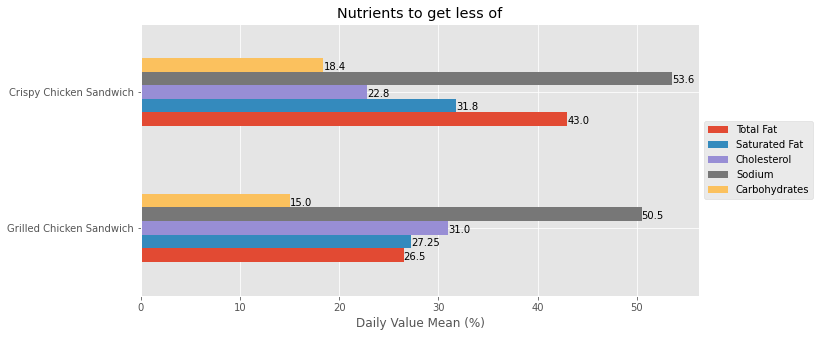

In [ ]:
#create new dataframe for Nutrients to get less of
df_negative_nutrients = pd.DataFrame({
    "Total Fat":[grilledChickenSW_negative_nutrients['Total Fat (% Daily Value)'], crispyChickenSW_negative_nutrients['Total Fat (% Daily Value)']],
    "Saturated Fat":[grilledChickenSW_negative_nutrients['Saturated Fat (% Daily Value)'], crispyChickenSW_negative_nutrients['Saturated Fat (% Daily Value)']],
    "Cholesterol":[grilledChickenSW_negative_nutrients['Cholesterol (% Daily Value)'], crispyChickenSW_negative_nutrients['Cholesterol (% Daily Value)']],
    "Sodium":[grilledChickenSW_negative_nutrients['Sodium (% Daily Value)'], crispyChickenSW_negative_nutrients['Sodium (% Daily Value)']],
    "Carbohydrates":[grilledChickenSW_negative_nutrients['Carbohydrates (% Daily Value)'], crispyChickenSW_negative_nutrients['Carbohydrates (% Daily Value)']]
    }, 
    index=["Grilled Chicken Sandwich", "Crispy Chicken Sandwich"],
)

print(df_negative_nutrients)
neg_nutrients_plot = df_negative_nutrients.plot(kind="barh", figsize=(10.0,5.0))
plt.title('Nutrients to get less of')
plt.xlabel('Daily Value Mean (%)')
plt.legend(loc = 'center left', bbox_to_anchor=(1.0, 0.5))
for i in neg_nutrients_plot.patches:
    #bar plot
    # get_x pulls left or right; get_height pushes up or down
    #neg_nutrients_plot.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))
    
    #barh
    #get_width pulls left or right; get_y pushes up or down
    neg_nutrients_plot.text(i.get_width(), i.get_y() + 0.015, str(round((i.get_width()), 2)), fontsize=10, color='black') #.text(x,y, value/string to add, fontsize, color)
plt.show()

Berdasarkan grafik diatas (Nutrisi yang sebaiknya dikurangi / bernilai rendah), Crispy Chicken Sandwich memilki lemak total lebih tinggi (43%) dan Kolesterol lebih kecil (22.8%) dari Grilled Chicken Sandwich. Sedangkan nutrisi lainnya perbedaannya kurang dari 5%. Tetapi berdasarkan https://www.fda.gov/food/new-nutrition-facts-label/how-understand-and-use-nutrition-facts-label, nilai lemak, kolesterol dan sodium yang bernilai lebih dari 20%, termasuk dalam kategori HIGH, sehingga sebaiknya mengurangi porsi per servingnya

                          Dietary Fiber  Vitamin A  Vitamin C  Calcium   Iron
Grilled Chicken Sandwich           13.5        6.0       19.5     22.5  18.75
Crispy Chicken Sandwich            12.4        5.6       14.6     21.0  18.00


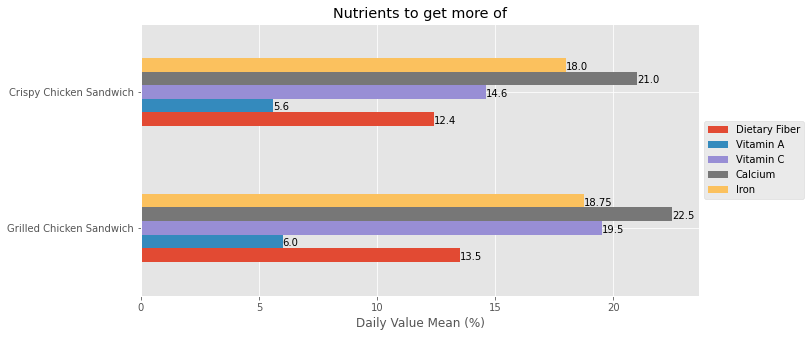

In [ ]:
#create new dataframe for Nutrients to get more of
df_positive_nutrients = pd.DataFrame({
    "Dietary Fiber":[grilledChickenSW_positive_nutrients['Dietary Fiber (% Daily Value)'], crispyChickenSW_positive_nutrients['Dietary Fiber (% Daily Value)']],
    "Vitamin A":[grilledChickenSW_positive_nutrients['Vitamin A (% Daily Value)'], crispyChickenSW_positive_nutrients['Vitamin A (% Daily Value)']],
    "Vitamin C":[grilledChickenSW_positive_nutrients['Vitamin C (% Daily Value)'], crispyChickenSW_positive_nutrients['Vitamin C (% Daily Value)']],
    "Calcium":[grilledChickenSW_positive_nutrients['Calcium (% Daily Value)'], crispyChickenSW_positive_nutrients['Calcium (% Daily Value)']],
    "Iron":[grilledChickenSW_positive_nutrients['Iron (% Daily Value)'], crispyChickenSW_positive_nutrients['Iron (% Daily Value)']]
    }, 
    index=["Grilled Chicken Sandwich", "Crispy Chicken Sandwich"],
)

print(df_positive_nutrients)
pos_nutrients_plot = df_positive_nutrients.plot(kind="barh", figsize=(10.0,5.0))
plt.title('Nutrients to get more of')
plt.xlabel('Daily Value Mean (%)')
plt.legend(loc = 'center left', bbox_to_anchor=(1.0, 0.5))
for i in pos_nutrients_plot.patches:
    #bar plot
    # get_x pulls left or right; get_height pushes up or down
    #neg_nutrients_plot.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))
    
    #barh
    #get_width pulls left or right; get_y pushes up or down
    pos_nutrients_plot.text(i.get_width(), i.get_y() + 0.015, str(round((i.get_width()), 2)), fontsize=10, color='black')
plt.show()

Berdasarkan grafik diatas (Nutrisi yang sebaiknya ditambah / bernilai tinggi), Nutrisi pada Crispy Chicken Sandwich dan Grilled Chicken Sandwich tidak berbeda jauh (< 3%). Secara keseluruhan Grilled Chicken Sandwich memiliki nilai nutrisi yang lebih tinggi daripada Crispy Chicken Sandwich.


**D) What about ordering egg
whites instead of whole
eggs**

Egg Whites

In [ ]:
#Create DF for Egg Whites
egg_whites = df[(df['Item'].str.contains('Egg White'))]
egg_whites.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,180,20.0,32,11.0,56,0.0,35,11,1300,54,36,12,2,7,3,20,2,8,15,10
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,38,12.0,59,0.0,35,11,1420,59,42,14,3,12,4,20,6,8,15,15
14,Breakfast,Sausage Biscuit with Egg Whites (Regular Biscuit),5.9 oz (167 g),460,250,27.0,42,12.0,62,0.0,35,11,1180,49,34,11,2,6,3,18,0,0,8,15


In [ ]:
eggWhites_negative_nutrients = egg_whites[['Item', 'Total Fat (% Daily Value)', 'Saturated Fat (% Daily Value)', 'Cholesterol (% Daily Value)',
                                                      'Sodium (% Daily Value)',
                                                      'Carbohydrates (% Daily Value)']].mean().sort_values(ascending = True)
eggWhites_negative_nutrients

Cholesterol (% Daily Value)      13.692308
Carbohydrates (% Daily Value)    17.615385
Total Fat (% Daily Value)        44.461538
Saturated Fat (% Daily Value)    56.153846
Sodium (% Daily Value)           59.769231
dtype: float64

In [ ]:
#rata-rata kolom per baris(axis=0) kemudian di sort mulai dari nilai terendah
eggWhites_positive_nutrients = egg_whites[['Item','Dietary Fiber (% Daily Value)', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 
                                                      'Calcium (% Daily Value)', 'Iron (% Daily Value)']].mean().sort_values(ascending = True)
eggWhites_positive_nutrients

Vitamin A (% Daily Value)         3.538462
Vitamin C (% Daily Value)         3.769231
Dietary Fiber (% Daily Value)    13.846154
Iron (% Daily Value)             15.230769
Calcium (% Daily Value)          17.000000
dtype: float64

Whole Egg

In [ ]:
#Create DF for Egg Whites
whole_egg = df[(df['Item'].str.contains('Egg'))] #ambil semua Item yang memiliki kata Egg
whole_egg = whole_egg[~whole_egg['Item'].str.contains('White')] #Hilangkan semua Item yang memilki kata White
whole_egg.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,210,23.0,36,9.0,46,1.0,300,100,960,40,31,10,4,18,3,26,15,2,30,20
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,0.0,250,83,1300,54,38,13,2,7,3,19,10,8,15,15
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,250,83,1410,59,43,14,3,12,4,19,15,8,20,20


In [ ]:
egg_negative_nutrients = whole_egg[['Item', 'Total Fat (% Daily Value)', 'Saturated Fat (% Daily Value)', 'Cholesterol (% Daily Value)',
                                                      'Sodium (% Daily Value)',
                                                      'Carbohydrates (% Daily Value)']].mean().sort_values(ascending = True)
egg_negative_nutrients

Carbohydrates (% Daily Value)    13.833333
Total Fat (% Daily Value)        43.583333
Sodium (% Daily Value)           51.250000
Saturated Fat (% Daily Value)    58.583333
Cholesterol (% Daily Value)      89.250000
dtype: float64

In [ ]:
#rata-rata kolom per baris(axis=0) kemudian di sort mulai dari nilai terendah
egg_positive_nutrients = whole_egg[['Item','Dietary Fiber (% Daily Value)', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 
                                                      'Calcium (% Daily Value)', 'Iron (% Daily Value)']].mean().sort_values(ascending = True)
egg_positive_nutrients

Vitamin C (% Daily Value)         4.083333
Dietary Fiber (% Daily Value)    11.416667
Vitamin A (% Daily Value)        12.583333
Iron (% Daily Value)             18.750000
Calcium (% Daily Value)          20.416667
dtype: float64

Plot

            Total Fat  Saturated Fat  Cholesterol     Sodium  Carbohydrates
Egg Whites  44.461538      56.153846    13.692308  59.769231      17.615385
Whole Eggs  43.583333      58.583333    89.250000  51.250000      13.833333


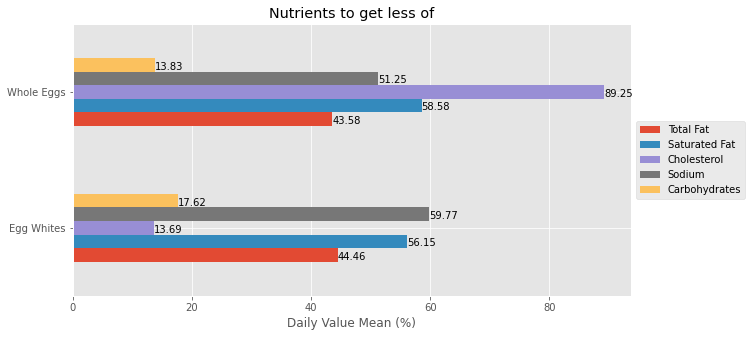

In [ ]:
#create new dataframe for Nutrients to get less of
df_negative_nutrients_egg = pd.DataFrame({
    "Total Fat":[eggWhites_negative_nutrients['Total Fat (% Daily Value)'], egg_negative_nutrients['Total Fat (% Daily Value)']],
    "Saturated Fat":[eggWhites_negative_nutrients['Saturated Fat (% Daily Value)'], egg_negative_nutrients['Saturated Fat (% Daily Value)']],
    "Cholesterol":[eggWhites_negative_nutrients['Cholesterol (% Daily Value)'], egg_negative_nutrients['Cholesterol (% Daily Value)']],
    "Sodium":[eggWhites_negative_nutrients['Sodium (% Daily Value)'], egg_negative_nutrients['Sodium (% Daily Value)']],
    "Carbohydrates":[eggWhites_negative_nutrients['Carbohydrates (% Daily Value)'], egg_negative_nutrients['Carbohydrates (% Daily Value)']]
    }, 
    index=["Egg Whites", "Whole Eggs"],
)

print(df_negative_nutrients_egg)
neg_nutrients_egg_plot = df_negative_nutrients_egg.plot(kind="barh", figsize=(10.0,5.0))
plt.title('Nutrients to get less of')
plt.xlabel('Daily Value Mean (%)')
plt.legend(loc = 'center left', bbox_to_anchor=(1.0, 0.5))
for i in neg_nutrients_egg_plot.patches:
    #bar plot
    # get_x pulls left or right; get_height pushes up or down
    #neg_nutrients_plot.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))
    
    #barh
    #get_width pulls left or right; get_y pushes up or down
    neg_nutrients_egg_plot.text(i.get_width(), i.get_y() + 0.015, str(round((i.get_width()), 2)), fontsize=10, color='black') #.text(x,y, value/string to add, fontsize, color)
plt.show()

Berdasarkan grafik diatas (Nutrisi yang sebaiknya dikurangi / bernilai rendah), Whole Eggs memilki kadar kolesterol yang sangat tinggi (89.25%) dibanding dengan Egg Whites. Sedangkan Egg Whites memilki Total Fat, Saturated Fat dan Sodium yang sedikit lebih tinggi dari Whole Egg. Jadi hindari Whole Eggs jika memilki riwayat penyakit kolesterol tinggi

            Dietary Fiber  Vitamin A  Vitamin C    Calcium       Iron
Egg Whites      13.846154   3.538462   3.769231  17.000000  15.230769
Whole Eggs      11.416667  12.583333   4.083333  20.416667  18.750000


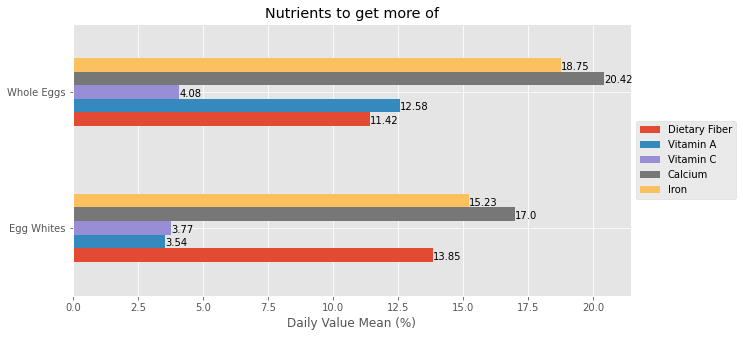

In [ ]:
#create new dataframe for Nutrients to get less of
df_positive_nutrients_egg = pd.DataFrame({
    "Dietary Fiber":[eggWhites_positive_nutrients['Dietary Fiber (% Daily Value)'], egg_positive_nutrients['Dietary Fiber (% Daily Value)']],
    "Vitamin A":[eggWhites_positive_nutrients['Vitamin A (% Daily Value)'], egg_positive_nutrients['Vitamin A (% Daily Value)']],
    "Vitamin C":[eggWhites_positive_nutrients['Vitamin C (% Daily Value)'], egg_positive_nutrients['Vitamin C (% Daily Value)']],
    "Calcium":[eggWhites_positive_nutrients['Calcium (% Daily Value)'], egg_positive_nutrients['Calcium (% Daily Value)']],
    "Iron":[eggWhites_positive_nutrients['Iron (% Daily Value)'], egg_positive_nutrients['Iron (% Daily Value)']]
    }, 
    index=["Egg Whites", "Whole Eggs"],
)

print(df_positive_nutrients_egg)
pos_nutrients_egg_plot = df_positive_nutrients_egg.plot(kind="barh", figsize=(10.0,5.0))
plt.title('Nutrients to get more of')
plt.xlabel('Daily Value Mean (%)')
plt.legend(loc = 'center left', bbox_to_anchor=(1.0, 0.5))
for i in pos_nutrients_egg_plot.patches:
    #bar plot
    # get_x pulls left or right; get_height pushes up or down
    #neg_nutrients_plot.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))
    
    #barh
    #get_width pulls left or right; get_y pushes up or down
    pos_nutrients_egg_plot.text(i.get_width(), i.get_y() + 0.015, str(round((i.get_width()), 2)), fontsize=10, color='black') #.text(x,y, value/string to add, fontsize, color)
plt.show()

Berdasarkan grafik diatas (Nutrisi yang sebaiknya ditambah / bernilai tinggi), Egg Whites memiliki Vitamin A, Vitamin B, Calcium dan Iron lebih rendah daripada Whole Eggs. Tetapi perlu diperhatikan bahwa Whole Egg memiliki kadar kolesterol 6.5 kali lipat lebih tinggi daripada Egg Whites. Sehingga secara keseluruhan, Egg Whites memiliki nilai nutrisi yang lebih baik. 

**E) What is the least number of
items could you order from
the menu to meet one day's 
nutritional requirements?**


In [ ]:
df_menu_by_nutritions = df[['Item','Total Fat (% Daily Value)',
                              'Saturated Fat (% Daily Value)','Cholesterol (% Daily Value)',
                              'Sodium (% Daily Value)','Carbohydrates (% Daily Value)',
                              'Dietary Fiber (% Daily Value)','Vitamin A (% Daily Value)',
                              'Vitamin C (% Daily Value)','Calcium (% Daily Value)',
                              'Iron (% Daily Value)']]
df_menu_by_nutritions.set_index('Item', inplace = True)
df_menu_by_nutritions.index.name = None
df_menu_by_nutritions

,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Egg McMuffin,20,25,87,31,10,17,10,0,25,15
Egg White Delight,12,15,8,32,10,17,6,0,25,8
Sausage McMuffin,35,42,15,33,10,17,8,0,25,10
Sausage McMuffin with Egg,43,52,95,36,10,17,15,0,30,15
Sausage McMuffin with Egg Whites,35,42,16,37,10,17,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...
McFlurry with Oreo Cookies (Small),26,44,14,12,27,4,15,0,40,8
McFlurry with Oreo Cookies (Medium),35,58,19,16,35,5,20,0,50,10
McFlurry with Oreo Cookies (Snack),17,29,9,8,18,2,10,0,25,6
McFlurry with Reese's Peanut Butter Cups (Medium),50,76,20,17,38,9,20,0,60,6


In [ ]:
df_information = df_menu_by_nutritions.describe()
df_information

,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,21.815385,29.965385,18.392308,20.676923,15.780769,6.530769,13.426923,8.534615,20.973077,7.734615
std,21.885199,26.639209,29.091653,24.034954,9.419544,6.307057,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,4.750000,2.000000,4.750000,10.000000,0.000000,2.000000,0.000000,6.000000,0.000000
50%,17.000000,24.000000,11.000000,8.000000,15.000000,5.000000,8.000000,0.000000,20.000000,4.000000
75%,35.000000,48.000000,21.250000,36.250000,20.000000,10.000000,15.000000,4.000000,30.000000,15.000000
max,182.000000,102.000000,192.000000,150.000000,47.000000,28.000000,170.000000,240.000000,70.000000,40.000000


In [ ]:
menu_list=[]
for i in df_information.columns:
  #if df_menu_by_nutritions[[i]] == df_information.loc['max',i]:
  menu_list.extend(df_menu_by_nutritions[ df_menu_by_nutritions[i] == df_information.loc['max',i]].index.tolist())
  #print(df_menu_by_nutritions[i].index.tolist())
  #print(df_menu_by_nutritions[df_menu_by_nutritions[i] == df_information.loc['max',i]].index.tolist())
  print(df_menu_by_nutritions[df_menu_by_nutritions[i] == df_information.loc['max',i]].index.tolist())
#print(menu_list)


['Chicken McNuggets (40 piece)']
['McFlurry with M&M’s Candies (Medium)']
['Big Breakfast with Hotcakes (Regular Biscuit)', 'Big Breakfast with Hotcakes (Large Biscuit)']
['Chicken McNuggets (40 piece)']
['Strawberry Shake (Large)', 'Chocolate Shake (Large)']
['Big Breakfast with Hotcakes (Large Biscuit)', 'Big Breakfast with Hotcakes and Egg Whites (Large Biscuit)', 'Premium Southwest Salad with Crispy Chicken', 'Premium Southwest Salad with Grilled Chicken']
['Premium Bacon Ranch Salad (without Chicken)', 'Premium Southwest Salad with Crispy Chicken', 'Premium Southwest Salad with Grilled Chicken']
['Minute Maid Orange Juice (Large)']
['Strawberry Shake (Large)', 'McFlurry with M&M’s Candies (Medium)']
['Big Breakfast with Hotcakes (Regular Biscuit)', 'Big Breakfast with Hotcakes (Large Biscuit)']
